#计划

1.分类问题中的k近邻（k-NN）算法
2.非参数回归
3.最近邻搜索方法

##参数和非参数机器学习方法

参数化方法:
(1)假设所需的依赖具有某些特殊形式，并且精度高达某些参数
(2)参数是优化问题的解

非参数方法:
度量算法(Метрические алгоритмы)，核方法(ядерные методы)

参数模型:
如果我们对所要学习的问题有足够的认识，具备一定的先验知识，此时我们一般会假定要学习的目标函数f(x)或分布P(y|x)的具体形式。然后，通过训练数据集，基于ERM、SRM、MLE、MAP等学习策略，可以估计出f(x)或P(y|x)中含有的未知参数。一旦未知参数估计完毕，训练数据一般来说，就失去其作用了，因为这些估计出来的参数就是训练数据的浓缩。通过这种方式建立起来的模型就是参数模型。参数模型的一个很重要的特点是，如果对于模型的假设正确，那么只需要很少的训练数据就可以从假设空间中学出一个很好的模型。但是，如果模型的假设错误，那么无论训练的数据量有多大，甚至趋于无穷大，学出的模型都会与实际模型出现不可磨灭的偏差。感知机、逻辑斯特回归、高斯判别分析、朴素贝叶斯、线性支持向量机都属于参数模型。对于神经网络来说，当固定了隐层的数目以及每一层神经元的个数，它也属于参数模型。但由于隐层数目与每一层神经元个数的不确定性，很多时候，神经网络都被归类为半参数模型。

非参数模型:
当我们对所要学习的问题知之甚少，此时我们一般不会对潜在的模型做过多的假设。在面对预测任务的时候，我们通常会用上所有的训练数据。例如简单的核密度估计(KDE)的表达式中，就带有所有训练数据的信息。通过这种方式建立的模型就是非参数模型。非参数模型的一个很重要的特点就是：let the data speak for itself. 正因为如此，非参数模型的存储开销、计算开销都会比参数模型大的多。但是，由于不存在模型的错误假定问题，可以证明，当训练数据量趋于无穷大的时候，非参数模型可以逼近任意复杂的真实模型。这正是非参数模型诱人的一点。另外需要说明的一点是，非参数模型之所以叫做非参数，并不是因为模型中没有参数。实际上，非参数模型中一般会含有一个或多个超参数，外加无穷多个普通的参数。k近邻就是典型的非参数模型。

##k近邻（k-NN）算法(K-Nearest Neighbor algorithm)

###k近邻（k-NN）算法思想

k近邻算法是一种基本分类和回归方法.

算法思想：
官方解释：给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例，这K个实例的多数属于某个类，就把该输入实例分类到这个类中。
通俗理解：K个最近的邻居，当K=1时，算法便成了最近邻算法，即寻找最近的那个邻居。为何要找邻居？打个比方来说，假设你来到一个陌生的村庄，现在你要找到与你有着相似特征的人群融入他们，所谓入伙。

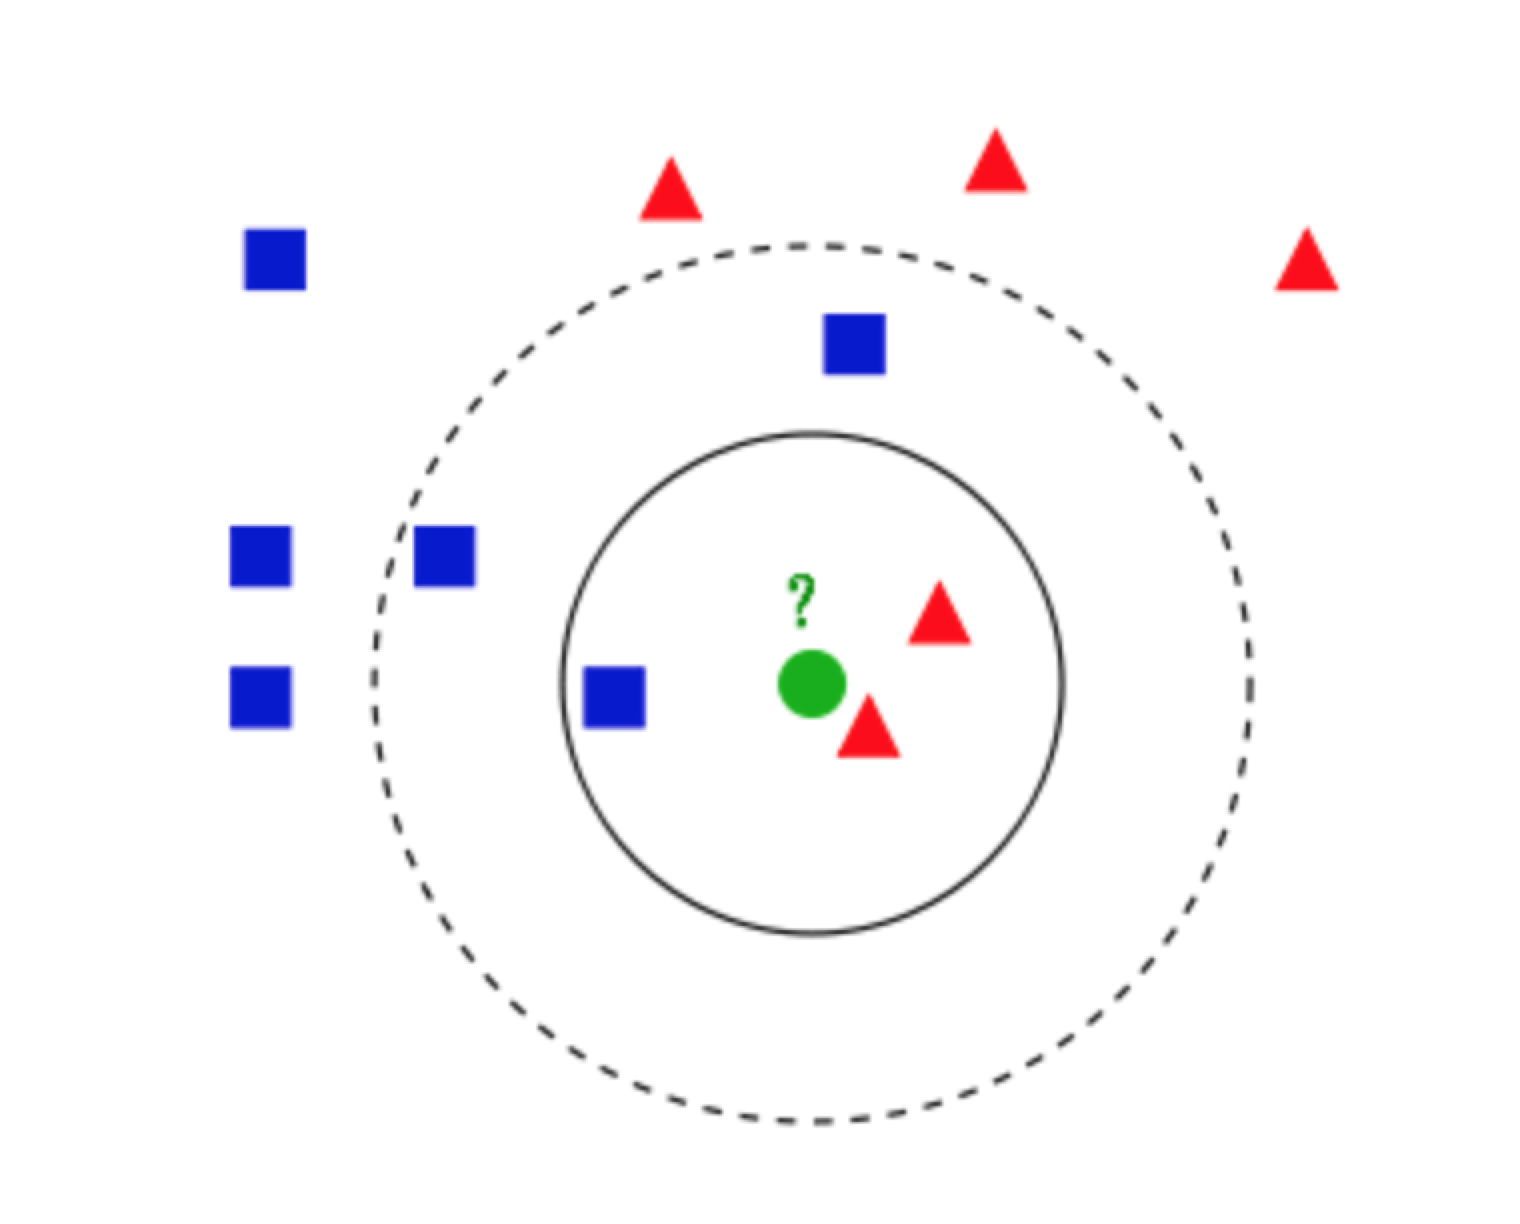
如上图所示，有两类不同的样本数据，分别用蓝色的小正方形和红色的小三角形表示，而图正中间的那个绿色的圆所标示的数据则是待分类的数据。也就是说，现在，我们不知道中间那个绿色的数据是从属于哪一类（蓝色小正方形or红色小三角形），下面，我们就要解决这个问题：给这个绿色的圆分类。
    
我们常说，物以类聚，人以群分，判别一个人是一个什么样品质特征的人，常常可以从他/她身边的朋友入手，所谓观其友，而识其人。我们不是要判别上图中那个绿色的圆是属于哪一类数据么，好说，从它的邻居下手。但一次性看多少个邻居呢？从上图中，你还能看到：

如果K=3，绿色圆点的最近的3个邻居是2个红色小三角形和1个蓝色小正方形，少数从属于多数，基于统计的方法，判定绿色的这个待分类点属于红色的三角形一类。
如果K=5，绿色圆点的最近的5个邻居是2个红色三角形和3个蓝色的正方形，还是少数从属于多数，基于统计的方法，判定绿色的这个待分类点属于蓝色的正方形一类。
    
于此我们看到，当无法判定当前待分类点是从属于已知分类中的哪一类时，我们可以依据统计学的理论看它所处的位置特征，衡量它周围邻居的权重(它最近的k个实例，哪个类别最多即可)，而把它归为(或分配)到权重更大的那一类。这就是K近邻算法的核心思想。

###k近邻（k-NN）算法距离度量（k）的选取

K近邻算法的核心在于找到实例点的邻居，这个时候，问题就接踵而至了，如何找到邻居，邻居的判定标准是什么，用什么来度量。这一系列问题便是下面要讲的距离度量表示法。会不会有这样的疑问，我是要找邻居，找相似性，怎么又跟距离扯上关系了？

这是因为特征空间中两个实例点的距离可以反应出两个实例点之间的相似性程度。K近邻模型的特征空间一般是n维实数向量空间，使用的距离可以使欧式距离，也是可以是其它距离。

####1.选取k值以及它的影响


k近邻的k值我们应该怎么选取呢？

如果我们选取较小的k值，那么就会意味着我们的整体模型会变得复杂，容易发生过拟合！恩~结论说完了，太抽象了吧你，不上图讲解号称通俗讲解的都是流氓~好吧，那我就上图来讲解

假设我们选取k=1这个极端情况，怎么就使得模型变得复杂，又容易过拟合了呢？

假设我们有训练数据和待分类点如下图：

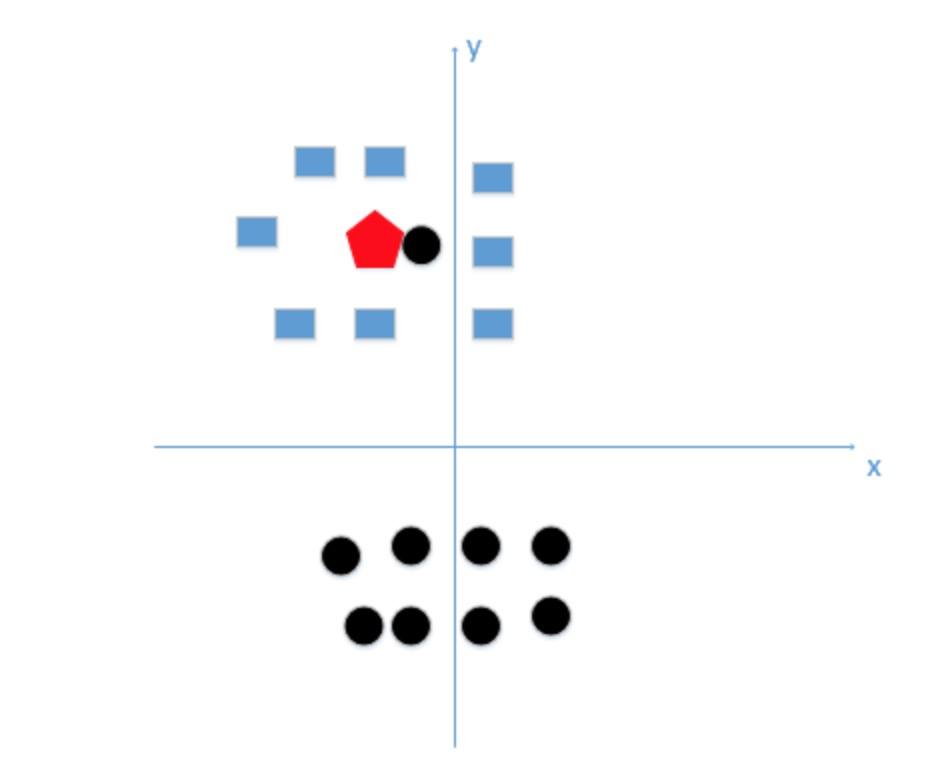

上图中有俩类，一个是黑色的圆点，一个是蓝色的长方形，现在我们的待分类点是红色的五边形。

好，根据我们的k近邻算法步骤来决定待分类点应该归为哪一类。我们由图中可以得到，很容易我们能够看出来五边形离黑色的圆点最近，k又等于1，那太好了，我们最终判定待分类点是黑色的圆点。

由这个处理过程我们很容易能够感觉出问题了，如果k太小了，比如等于1，那么模型就太复杂了，我们很容易学习到噪声，也就非常容易判定为噪声类别，而在上图，如果，k大一点，k等于8，把长方形都包括进来，我们很容易得到我们正确的分类应该是蓝色的长方形！如下图：

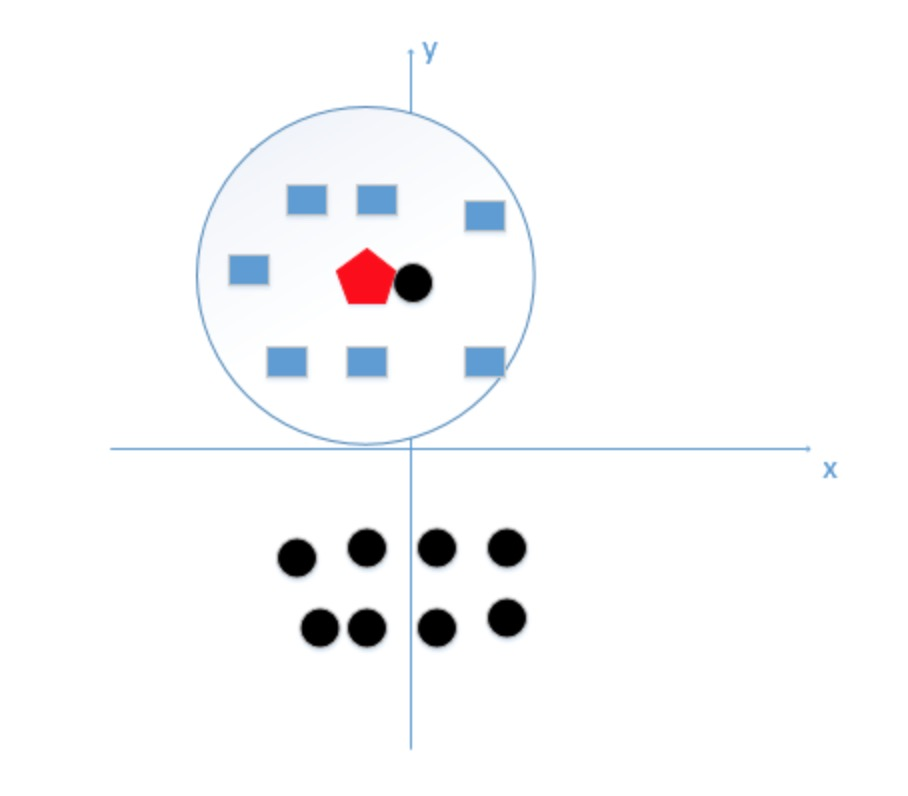

所谓的过拟合就是在训练集上准确率非常高，而在测试集上准确率低，经过上例，我们可以得到k太小会导致过拟合，很容易将一些噪声（如上图离五边形很近的黑色圆点）学习到模型中，而忽略了数据真实的分布！

如果我们选取较大的k值，就相当于用较大邻域中的训练数据进行预测，这时与输入实例较远的（不相似）训练实例也会对预测起作用，使预测发生错误，k值的增大意味着整体模型变得简单。

k值增大怎么就意味着模型变得简单了，不要急，我会解释的！哈哈。

我们想，如果k=N（N为训练样本的个数）,那么无论输入实例是什么，都将简单地预测它属于在训练实例中最多的类。这时，模型是不是非常简单，这相当于你压根就没有训练模型呀！直接拿训练数据统计了一下各个数据的类别，找最大的而已！这好像下图所示：

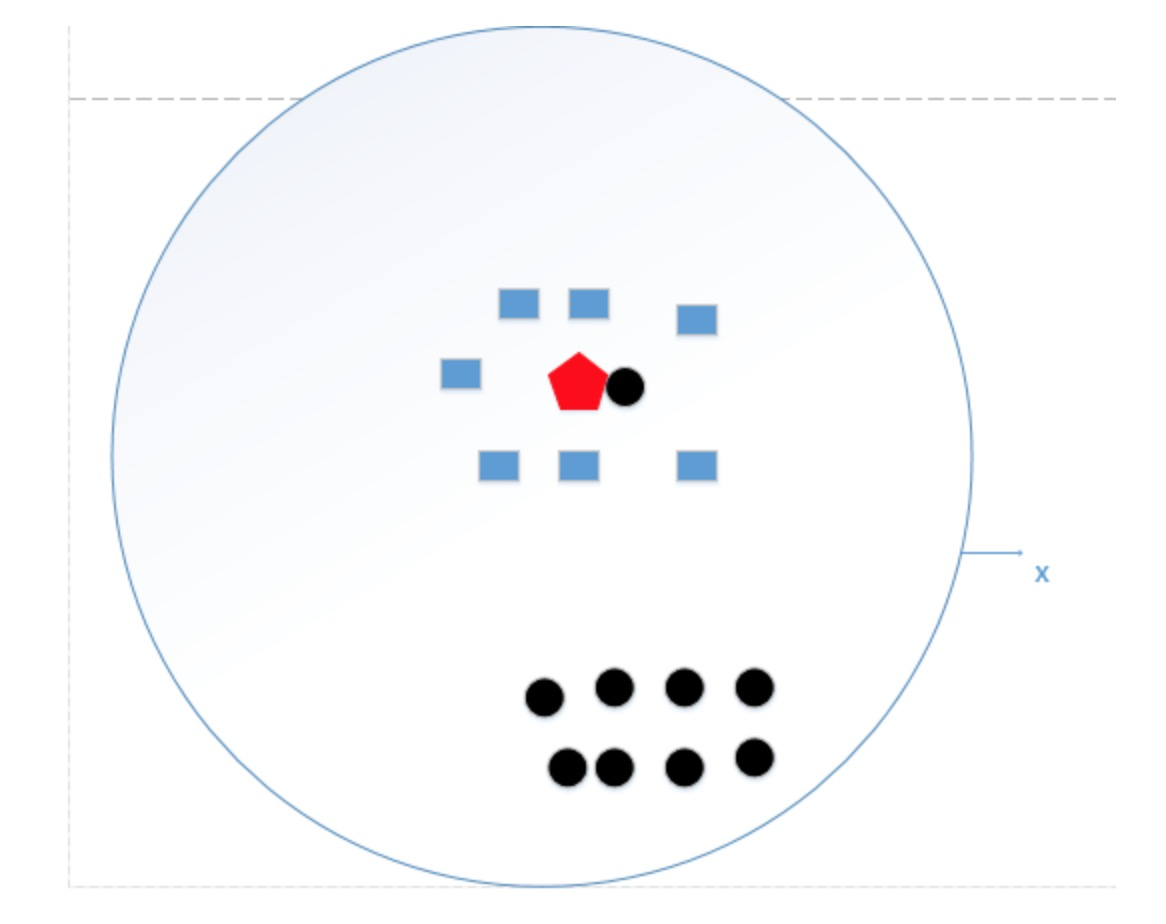

我们统计了黑色圆形是8个，长方形个数是7个，那么哈哈，如果k=N，我就得出结论了，红色五边形是属于黑色圆形的（明显是错误的好不，捂脸！）
这个时候，模型过于简单，完全忽略训练数据实例中的大量有用信息，是不可取的。

恩，k值既不能过大，也不能过小，在我举的这个例子中，我们k值的选择，在下图红色圆边界之间这个范围是最好的，如下图：

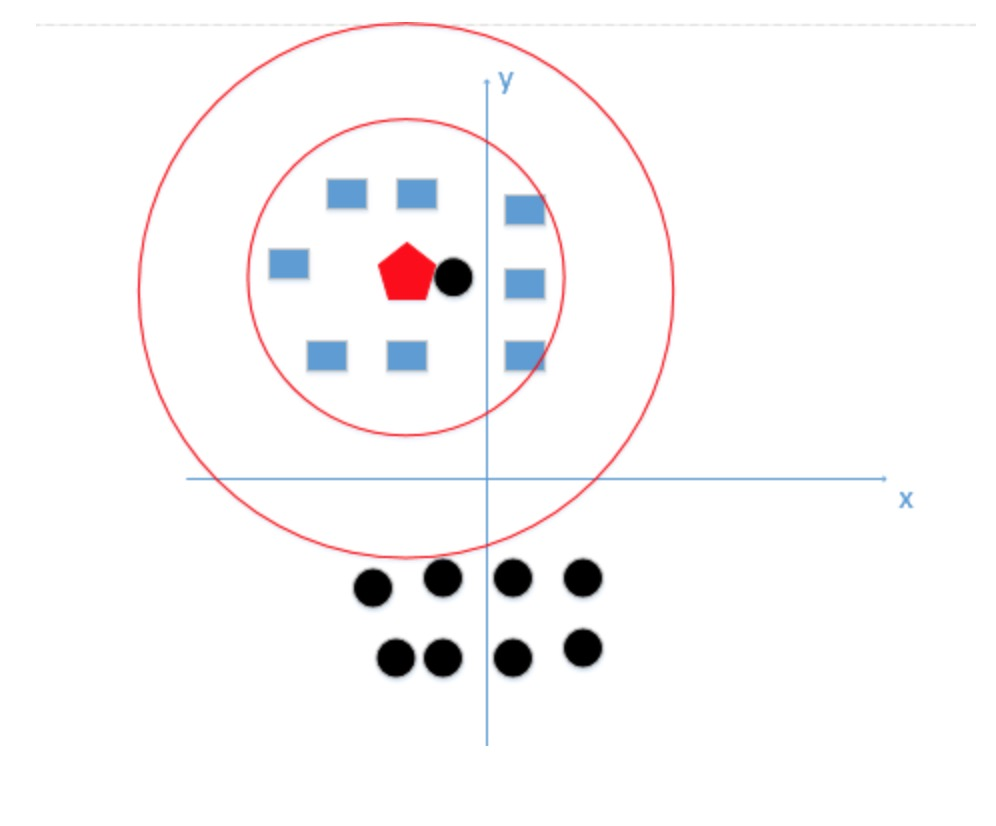

（注：这里只是为了更好让大家理解，真实例子中不可能只有俩维特征，但是原理是一样的1，我们就是想找到较好的k值大小）

那么我们一般怎么选取呢？李航博士书上讲到，我们一般选取一个较小的数值，通常采取 交叉验证法来选取最优的k值。（也就是说，选取k值很重要的关键是实验调参，类似于神经网络选取多少层这种，通过调整超参数来得到一个较好的结果）


####2.距离的度量

（1）欧氏距离

最常见的两点之间或多点之间的距离表示法，又称之为欧几里得度量，它定义于欧几里得空间中，如点 x = (x1,...,xn) 和 y = (y1,...,yn) 之间的距离为：
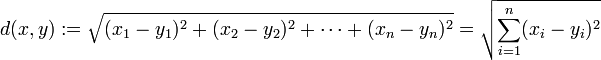


1）二维平面上两点a(x1,y1)与b(x2,y2)间的欧氏距离：
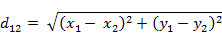

（1）欧氏距离

最常见的两点之间或多点之间的距离表示法，又称之为欧几里得度量，它定义于欧几里得空间中，如点 x = (x1,...,xn) 和 y = (y1,...,yn) 之间的距离为：
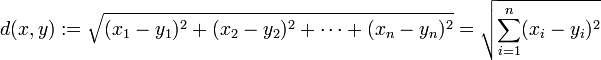

1）二维平面上两点a(x1,y1)与b(x2,y2)间的欧氏距离：
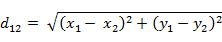

2）三维空间两点a(x1,y1,z1)与b(x2,y2,z2)间的欧氏距离：
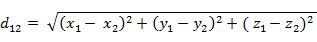

3）两个n维向量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的欧氏距离：
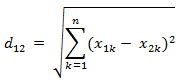

也可以用表示成向量运算的形式：
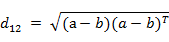


二维平面上两点欧式距离，代码可以如下编写：

In [ ]:

//unixfy：计算欧氏距离
double euclideanDistance(const vector<double>& v1, const vector<double>& v2)
{
     assert(v1.size() == v2.size());
     double ret = 0.0;
     for (vector<double>::size_type i = 0; i != v1.size(); ++i)
     {
         ret += (v1[i] - v2[i]) * (v1[i] - v2[i]);
     }
     return sqrt(ret);
}

 (2)曼哈顿距离

我们可以定义曼哈顿距离的正式意义为L1-距离或城市区块距离，也就是在欧几里得空间的固定直角坐标系上两点所形成的线段对轴产生的投影的距离总和。例如在平面上，坐标（x1, y1）的点P1与坐标（x2, y2）的点P2的曼哈顿距离为：

要注意的是，曼哈顿距离依赖座标系统的转度，而非系统在座标轴上的平移或映射。 

通俗来讲，想象你在曼哈顿要从一个十字路口开车到另外一个十字路口，驾驶距离是两点间的直线距离吗？显然不是，除非你能穿越大楼。而实际驾驶距离就是这个“曼哈顿距离”，此即曼哈顿距离名称的来源， 同时，曼哈顿距离也称为城市街区距离(City Block distance)。

1)二维平面两点a(x1,y1)与b(x2,y2)间的曼哈顿距离:


2)两个n维向量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的曼哈顿距离 :
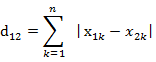


(3)切比雪夫距离

若二个向量或二个点p 、and q，其座标分别为及，则两者之间的切比雪夫距离定义如下：

这也等于以下Lp度量的极值：
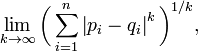
因此切比雪夫距离也称为L∞度量。
 
以数学的观点来看，切比雪夫距离是由一致范数（uniform norm）（或称为上确界范数）所衍生的度量，也是超凸度量（injective metric space）的一种。

在平面几何中，若二点p及q的直角坐标系坐标为及,则切比雪夫距离为：


玩过国际象棋的朋友或许知道，国王走一步能够移动到相邻的8个方格中的任意一个。那么国王从格子(x1,y1)走到格子(x2,y2)最少需要多少步？。你会发现最少步数总是max( | x2-x1 | , | y2-y1 | ) 步 。有一种类似的一种距离度量方法叫切比雪夫距离。

1)二维平面两点a(x1,y1)与b(x2,y2)间的切比雪夫距离 :


2)两个n维向量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的切比雪夫距离:
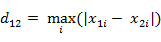

这个公式的另一种等价形式是 
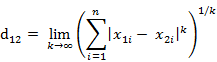


（4）闵可夫斯基距离(Minkowski Distance) 

闵氏距离不是一种距离，而是一组距离的定义。

闵氏距离的定义：
两个n维变量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的闵可夫斯基距离定义为： 
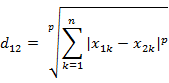

其中p是一个变参数。

当p=1时，就是曼哈顿距离

当p=2时，就是欧氏距离

当p→∞时，就是切比雪夫距离       

根据变参数的不同，闵氏距离可以表示一类的距离。 

（5）标准化欧氏距离 (Standardized Euclidean distance )

标准化欧氏距离是针对简单欧氏距离的缺点而作的一种改进方案。标准欧氏距离的思路：既然数据各维分量的分布不一样，那先将各个分量都“标准化”到均值、方差相等。至于均值和方差标准化到多少，先复习点统计学知识。

假设样本集X的数学期望或均值(mean)为m，标准差(standard deviation，方差开根)为s，那么X的“标准化变量”X*表示为：(X-m）/s，而且标准化变量的数学期望为0，方差为1。
即，样本集的标准化过程(standardization)用公式描述就是：
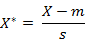
标准化后的值 =  ( 标准化前的值  － 分量的均值 ) /分量的标准差　　

经过简单的推导就可以得到两个n维向量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的标准化欧氏距离的公式：　　
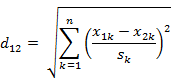

如果将方差的倒数看成是一个权重，这个公式可以看成是一种加权欧氏距离(Weighted Euclidean distance)。 


（6）马氏距离(Mahalanobis Distance)

1）马氏距离定义 

有M个样本向量X1~Xm，协方差矩阵记为S，均值记为向量μ，则其中样本向量X到u的马氏距离表示为： 
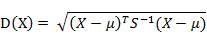

（协方差矩阵中每个元素是各个矢量元素之间的协方差Cov(X,Y)，Cov(X,Y) = E{ [X-E(X)] [Y-E(Y)]}，其中E为数学期望）

而其中向量Xi与Xj之间的马氏距离定义为：    
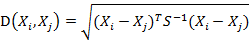

若协方差矩阵是单位矩阵（各个样本向量之间独立同分布）,则公式就成了：       
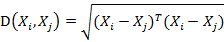
也就是欧氏距离了。　　

若协方差矩阵是对角矩阵，公式变成了标准化欧氏距离。

2）马氏距离的优缺点：量纲无关，排除变量之间的相关性的干扰。 

「微博上的seafood高清版点评道：原来马氏距离是根据协方差矩阵演变，一直被误导了，怪不得看Killian在05年NIPS发表的LMNN论文时候老是看到协方差矩阵和半正定，原来是这回事」

（7）巴氏距离（Bhattacharyya Distance）

在统计中，Bhattacharyya距离测量两个离散或连续概率分布的相似性。它与衡量两个统计样品或种群之间的重叠量的Bhattacharyya系数密切相关。Bhattacharyya距离和Bhattacharyya系数以20世纪30年代曾在印度统计研究所工作的一个统计学家A. Bhattacharya命名。同时，Bhattacharyya系数可以被用来确定两个样本被认为相对接近的，它是用来测量中的类分类的可分离性。

1）巴氏距离的定义
对于离散概率分布 p和q在同一域 X，它被定义为：

其中：
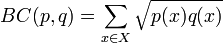
是Bhattacharyya系数。
对于连续概率分布，Bhattacharyya系数被定义为：
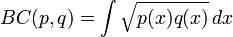

在 这两种情况下，巴氏距离 并没有服从三角不等式.（值得一提的是，Hellinger距离不服从三角不等式 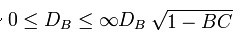。对于多变量的高斯分布 ，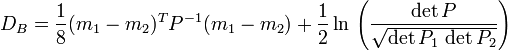，和协方差的分布 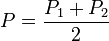需要注意的是，在这种情况下，第一项中的Bhattacharyya距离与马氏距离有关联。

2）Bhattacharyya系数
Bhattacharyya系数是两个统计样本之间的重叠量的近似测量，可以被用于确定被考虑的两个样本的相对接近。

计算Bhattacharyya系数涉及集成的基本形式的两个样本的重叠的时间间隔的值的两个样本被分裂成一个选定的分区数，并且在每个分区中的每个样品的成员的数量，在下面的公式中使用
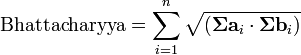
考虑样品a 和 b ，n是的分区数，并且被一个 和 b i的日分区中的样本数量的成员。


（8）汉明距离(Hamming distance)

两个等长字符串s1与s2之间的汉明距离定义为将其中一个变为另外一个所需要作的最小替换次数。例如字符串“1111”与“1001”之间的汉明距离为2。应用：信息编码（为了增强容错性，应使得编码间的最小汉明距离尽可能大）。

In [ ]:
//动态规划：  
  
//f[i,j]表示s[0...i]与t[0...j]的最小编辑距离。  
f[i,j] = min { f[i-1,j]+1,  f[i,j-1]+1,  f[i-1,j-1]+(s[i]==t[j]?0:1) }  
  
//分别表示：添加1个，删除1个，替换1个（相同就不用替换）。

（9）夹角余弦(Cosine) 

几何中夹角余弦可用来衡量两个向量方向的差异，机器学习中借用这一概念来衡量样本向量之间的差异。

1）在二维空间中向量A(x1,y1)与向量B(x2,y2)的夹角余弦公式：
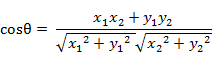

2）两个n维样本点a(x11,x12,…,x1n)和b(x21,x22,…,x2n)的夹角余弦：
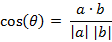

类似的，对于两个n维样本点a(x11,x12,…,x1n)和b(x21,x22,…,x2n)，可以使用类似于夹角余弦的概念来衡量它们间的相似程度，即：       
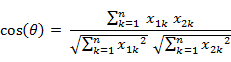


（10）杰卡德相似系数(Jaccard similarity coefficient)

1）杰卡德相似系数       
两个集合A和B的交集元素在A，B的并集中所占的比例，称为两个集合的杰卡德相似系数，用符号J(A,B)表示。　
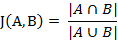
杰卡德相似系数是衡量两个集合的相似度一种指标。

2）杰卡德距离     
与杰卡德相似系数相反的概念是杰卡德距离(Jaccard distance)。
杰卡德距离可用如下公式表示：　　
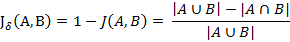

杰卡德距离用两个集合中不同元素占所有元素的比例来衡量两个集合的区分度。

3）杰卡德相似系数与杰卡德距离的应用      
可将杰卡德相似系数用在衡量样本的相似度上。
举例：样本A与样本B是两个n维向量，而且所有维度的取值都是0或1，例如：A(0111)和B(1011)。我们将样本看成是一个集合，1表示集合包含该元素，0表示集合不包含该元素。
M11 ：样本A与B都是1的维度的个数
M01：样本A是0，样本B是1的维度的个数
M10：样本A是1，样本B是0 的维度的个数
M00：样本A与B都是0的维度的个数
依据上文给的杰卡德相似系数及杰卡德距离的相关定义，样本A与B的杰卡德相似系数J可以表示为：
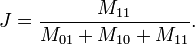

这里M11+M01+M10可理解为A与B的并集的元素个数，而M11是A与B的交集的元素个数。而样本A与B的杰卡德距离表示为J'：
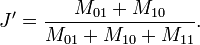


（11）皮尔逊系数(Pearson Correlation Coefficient)

在具体阐述皮尔逊相关系数之前，有必要解释下什么是相关系数 ( Correlation coefficient )与相关距离(Correlation distance)。

相关系数 ( Correlation coefficient )的定义是：
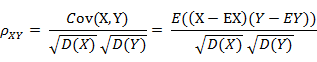

(其中，E为数学期望或均值，D为方差，D开根号为标准差，E{ [X-E(X)] [Y-E(Y)]}称为随机变量X与Y的协方差，记为Cov(X,Y)，即Cov(X,Y) = E{ [X-E(X)] [Y-E(Y)]}，而两个变量之间的协方差和标准差的商则称为随机变量X与Y的相关系数，记为)

相关系数衡量随机变量X与Y相关程度的一种方法，相关系数的取值范围是[-1,1]。相关系数的绝对值越大，则表明X与Y相关度越高。当X与Y线性相关时，相关系数取值为1（正线性相关）或-1（负线性相关）。
    
具体的，如果有两个变量：X、Y，最终计算出的相关系数的含义可以有如下理解：
当相关系数为0时，X和Y两变量无关系。
当X的值增大（减小），Y值增大（减小），两个变量为正相关，相关系数在0.00与1.00之间。
当X的值增大（减小），Y值减小（增大），两个变量为负相关，相关系数在-1.00与0.00之间。
  
相关距离的定义是：


OK，接下来，咱们来重点了解下皮尔逊相关系数。

在统计学中，皮尔逊积矩相关系数（英语：Pearson product-moment correlation coefficient，又称作 PPMCC或PCCs, 用r表示）用于度量两个变量X和Y之间的相关（线性相关），其值介于-1与1之间。

通常情况下通过以下取值范围判断变量的相关强度：
相关系数          0.8-1.0     极强相关
                 0.6-0.8     强相关
                 0.4-0.6     中等程度相关
                 0.2-0.4     弱相关
                 0.0-0.2     极弱相关或无相关

在自然科学领域中，该系数广泛用于度量两个变量之间的相关程度。它是由卡尔·皮尔逊从弗朗西斯·高尔顿在19世纪80年代提出的一个相似却又稍有不同的想法演变而来的。这个相关系数也称作“皮尔森相关系数r”。

1)皮尔逊系数的定义：
两个变量之间的皮尔逊相关系数定义为两个变量之间的协方差和标准差的商：
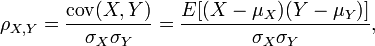

其中标准差的计算公式为： 
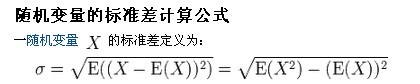

以上方程定义了总体相关系数, 一般表示成希腊字母ρ(rho)。基于样本对协方差和方差进行估计，可以得到样本标准差, 一般表示成r：
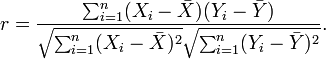

一种等价表达式的是表示成标准分的均值。基于(Xi, Yi)的样本点，样本皮尔逊系数是
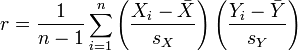

其中 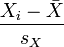，，及，分别是标准分、样本平均值和样本标准差。
或许上面的讲解令你头脑混乱不堪，没关系，我换一种方式讲解，如下：
假设有两个变量X、Y，那么两变量间的皮尔逊相关系数可通过以下公式计算：

公式一：
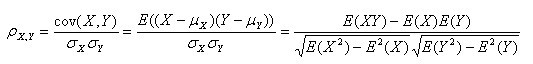

公式二：
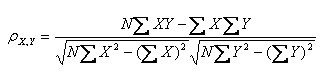

公式三：
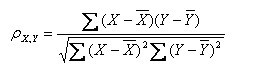

公式四：
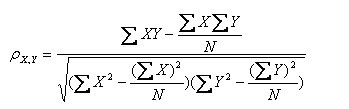

以上列出的四个公式等价，其中E是数学期望，cov表示协方差，N表示变量取值的个数。

2)皮尔逊相关系数的适用范围
当两个变量的标准差都不为零时，相关系数才有定义，皮尔逊相关系数适用于：

*两个变量之间是线性关系，都是连续数据。
*两个变量的总体是正态分布，或接近正态的单峰分布。
*两个变量的观测值是成对的，每对观测值之间相互独立。

3)如何理解皮尔逊相关系数
rubyist：皮尔逊相关系数理解有两个角度

其一, 按照高中数学水平来理解, 它很简单, 可以看做将两组数据首先做Z分数处理之后, 然后两组数据的乘积和除以样本数，Z分数一般代表正态分布中, 数据偏离中心点的距离.等于变量减掉平均数再除以标准差.(就是高考的标准分类似的处理)

样本标准差则等于变量减掉平均数的平方和，再除以样本数，最后再开方，也就是说，方差开方即为标准差，样本标准差计算公式为：
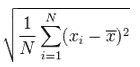

所以, 根据这个最朴素的理解,我们可以将公式依次精简为:
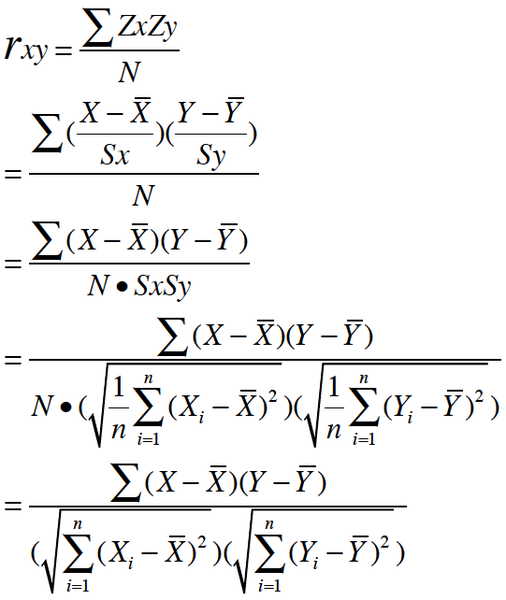

其二, 按照大学的线性数学水平来理解, 它比较复杂一点,可以看做是两组数据的向量夹角的余弦。下面是关于此皮尔逊系数的几何学的解释，先来看一幅图，如下所示：
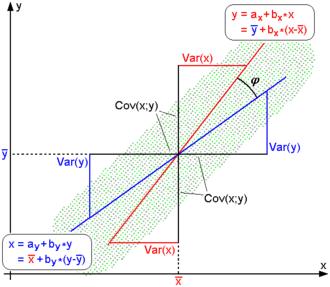
回归直线： y=gx(x) [红色] 和 x=gy(y) [蓝色]

如上图，对于没有中心化的数据, 相关系数与两条可能的回归线y=gx(x) 和 x=gy(y) 夹角的余弦值一致。

对于没有中心化的数据 (也就是说, 数据移动一个样本平均值以使其均值为0), 相关系数也可以被视作由两个随机变量 向量 夹角 的 余弦值（见下方）。

举个例子，例如，有5个国家的国民生产总值分别为 10, 20, 30, 50 和 80 亿美元。 假设这5个国家 (顺序相同) 的贫困百分比分别为 11%, 12%, 13%, 15%, and 18% 。 令 x 和 y 分别为包含上述5个数据的向量: x = (1, 2, 3, 5, 8) 和 y = (0.11, 0.12, 0.13, 0.15, 0.18)。
利用通常的方法计算两个向量之间的夹角  (参见 数量积), 未中心化 的相关系数是:
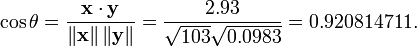

我们发现以上的数据特意选定为完全相关: y = 0.10 + 0.01 x。 于是，皮尔逊相关系数应该等于1。将数据中心化 (通过E(x) = 3.8移动 x 和通过 E(y) = 0.138 移动 y ) 得到 x = (−2.8, −1.8, −0.8, 1.2, 4.2) 和 y = (−0.028, −0.018, −0.008, 0.012, 0.042), 从中
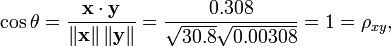

4)皮尔逊相关的约束条件

从以上解释, 也可以理解皮尔逊相关的约束条件:

*两个变量间有线性关系
*变量是连续变量
*变量均符合正态分布,且二元分布也符合正态分布
*两变量独立
在实践统计中,一般只输出两个系数,一个是相关系数,也就是计算出来的相关系数大小,在-1到1之间;另一个是独立样本检验系数,用来检验样本一致性。

简单说来，各种“距离”的应用场景简单概括为，空间：欧氏距离，路径：曼哈顿距离，国际象棋国王：切比雪夫距离，以上三种的统一形式:闵可夫斯基距离，加权：标准化欧氏距离，排除量纲和依存：马氏距离，向量差距：夹角余弦，编码差别：汉明距离，集合近似度：杰卡德类似系数与距离，相关：相关系数与相关距离。
